## Importing Packages

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
from keras.models import load_model
from time import sleep
from keras.preprocessing.image import img_to_array
from keras.preprocessing import image
import cv2
import numpy as np
import matplotlib.pyplot as plt
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import pytesseract


## Models and Labels

In [4]:
face_classifier = cv2.CascadeClassifier(r'C:\Users\mohtm\OneDrive\AI in Enterprise Systems\Project Submission\haarcascade_frontalface.xml')
classifier =load_model(r'C:\Users\mohtm\OneDrive\AI in Enterprise Systems\Project Submission\Emotion_little_vgg.h5')

# class_labels = ['Angry','Happy','Neutral','Sad','Surprise']
class_labels = ['Angry','Positive','Neutral','Negative','Surprise']

## Image Sentiment Detection

In [5]:
#This is used to prepare the image for training and for calling the model for training
def Image_Sentiment(imgPath):
    test_img = cv2.imread(imgPath)
    gray_img= cv2.cvtColor(test_img, cv2.COLOR_BGR2GRAY)
    faces = face_classifier.detectMultiScale(gray_img,1.3,5)
    if len(faces) != 0:
        x,y,w,h = faces[0]
        roi_gray = gray_img[y:y+h,x:x+w]
    else:
        roi_gray = gray_img
    roi_gray =  cv2.resize(roi_gray,(48,48),interpolation=cv2.INTER_AREA)
    roi = roi_gray.astype('float')/255.0
    roi = img_to_array(roi)
    roi = np.expand_dims(roi,axis=0)
    preds = classifier.predict(roi)[0]
    label=class_labels[preds.argmax()]
    label_position = (35,35)
    cv2.putText(test_img,label,label_position,cv2.FONT_HERSHEY_SIMPLEX,1,(255,0,0),3)
    plt.imshow(test_img)

## Sentiment Analysis on Text

In [6]:
#This will show the output for the text 
def Text_Sentiments(text):
    analyzer = SentimentIntensityAnalyzer()
    sentiments = analyzer.polarity_scores(text)
    if sentiments["compound"] >=0.05:
        print("Positive")
    elif (sentiments["compound"] > -0.05) and (sentiments["compound"] < 0.05):
        print("Neutral")
    elif sentiments["compound"]  <= -0.05:
         print("Negative")

## We are Extracting Text from Image and Analysing Sentiments on Image and extracted Text

# Example 1

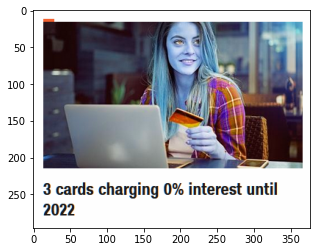

In [21]:
img_path = r"images\img1.PNG"
img = cv2.imread(img_path)
plt.imshow(img)

### Reading text from image

In [22]:
text = pytesseract.image_to_string(img)
text

'3 cards charging 0% interest until\n2022\n\n \n\x0c'

### Image Sentiment

In [23]:
Text_Sentiments(text)

Positive


In [10]:
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\mohtm\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

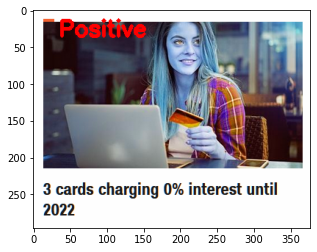

In [24]:
Image_Sentiment(img_path)

Text Sentiment

In [25]:
Text_Sentiments(text)

Positive


# Example 2

### Text Sentiment

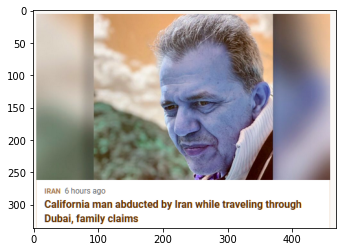

In [26]:
img_path = r"images\img2.PNG"
img = cv2.imread(img_path)
plt.imshow(img)

### Reading text from image

In [27]:
text = pytesseract.image_to_string(img)
text

' \n\nIRAN 6hours ago\nCalifornia man abducted by Iran while traveling through\nDubai, family claims\n\x0c'

### Image Sentiment

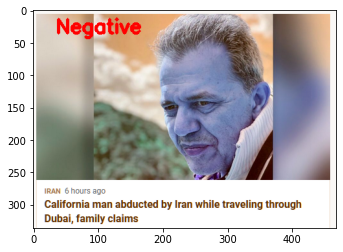

In [28]:
Image_Sentiment(img_path)

### Text Sentiment

In [29]:
Text_Sentiments(text)

Negative


# Example 3

Text Sentiment

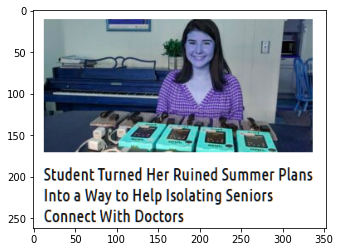

In [30]:
img_path = r"images\img3.PNG"
img = cv2.imread(img_path)
plt.imshow(img)

Reading from Image

In [31]:
text3 = pytesseract.image_to_string(img)
text3

' \n\nStudent Turned Her Ruined Summer Plans\nInto a Way to Help Isolating Seniors\nConnect With Doctors\n\x0c'

Image Sentiment

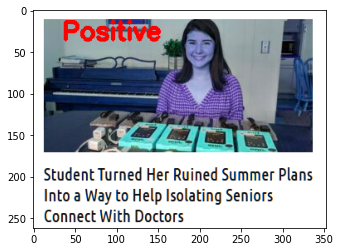

In [32]:
Image_Sentiment(img_path)

Text Sentiment

In [33]:
Text_Sentiments(text3)

Negative
